In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite

In [2]:
with open("../web_scraping/movie_characters_dict.json", "r") as f:
    movie_char_dict = json.load(f)

with open("../web_scraping/cleaned_comic_characters_dict.json", "r") as f:
    comic_char_dict = json.load(f)

In [3]:
for i in movie_char_dict.items():
    print(i)

('Iron Man', [{'name': 'Tony Stark/Iron Man', 'href': '/wiki/Iron_Man'}, {'name': 'Obadiah Stane/Iron Monger', 'href': '/wiki/Iron_Monger'}, {'name': 'Pepper Potts', 'href': '/wiki/Pepper_Potts'}])
('The Incredible Hulk', [{'name': 'Bruce Banner/Hulk', 'href': '/wiki/Hulk'}, {'name': 'Betty Ross', 'href': '/wiki/Betty_Ross'}, {'name': 'Emil Blonsky/Abomination', 'href': '/wiki/Abomination'}, {'name': 'Thaddeus Ross', 'href': '/wiki/Thaddeus_Ross'}])
('Iron Man 2', [{'name': 'Tony Stark/Iron Man', 'href': '/wiki/Iron_Man'}, {'name': 'Pepper Potts', 'href': '/wiki/Pepper_Potts'}, {'name': 'James Rhodes/War Machine', 'href': '/wiki/War_Machine'}, {'name': 'Natasha Romanoff/Black Widow', 'href': '/wiki/Black_Widow'}, {'name': 'Justin Hammer', 'href': '/wiki/Justin_Hammer'}, {'name': 'Ivan Vanko/Whiplash', 'href': '/wiki/Whiplash'}])
('Thor', [{'name': 'Jane Foster', 'href': '/wiki/Jane_Foster'}, {'name': 'Loki', 'href': '/wiki/Loki'}, {'name': 'Odin', 'href': '/wiki/Odin'}, {'name': 'Heimd

In [4]:
for i in comic_char_dict.items():
    print(i)

('Avengers: Battle the Earth-Wrecker', [{'name': 'Captain America (Steve Rogers)', 'href': '/wiki/Steven_Rogers_(Earth-201163)'}, {'name': 'Goliath (Hank Pym)', 'href': '/wiki/Steven_Rogers_(Earth-201163)'}, {'name': 'Hawkeye (Clint Barton)', 'href': '/wiki/Steven_Rogers_(Earth-201163)'}, {'name': 'Wasp (Janet Van Dyne)', 'href': '/wiki/Steven_Rogers_(Earth-201163)'}, {'name': 'Iron Man (Tony Stark)', 'href': '/wiki/Steven_Rogers_(Earth-201163)'}])
('Fantastic Four in The House of Horrors', [{'name': 'Mr. Fantastic (Reed Richards)', 'href': '/wiki/Steven_Rogers_(Earth-201163)'}, {'name': 'Invisible Girl (Susan Storm)', 'href': '/wiki/Steven_Rogers_(Earth-201163)'}, {'name': 'Thing (Ben Grimm)', 'href': '/wiki/Steven_Rogers_(Earth-201163)'}, {'name': 'Human Torch (Johnny Storm)', 'href': '/wiki/Steven_Rogers_(Earth-201163)'}, {'name': 'Doctor Weird', 'href': '/wiki/Doctor_Weird_(Earth-616)'}])
('Spider-Man Zaps Mr. Zodiac', [{'name': 'Spider-Man (Peter Parker)', 'href': '/wiki/Doctor_We

In [5]:
def char_graph(char_dict):
    """
    This functions returns a character graph where characters are connected if they have appeared in the same movie/comic.
    """
    
    G = nx.Graph()

    for node, char in char_dict.items():
        char_names = [i['name'] for i in char]

        # Looping through charcters twice in order to add an edge
        for i, char1 in enumerate(char_names):
            for char2 in char_names[i + 1:]:
                G.add_edge(char1, char2, movie_comic=node)

    return G

In [6]:
G_movie = char_graph(movie_char_dict)

In [7]:
G_movie.edges()

EdgeView([('Tony Stark/Iron Man', 'Obadiah Stane/Iron Monger'), ('Tony Stark/Iron Man', 'Pepper Potts'), ('Tony Stark/Iron Man', 'James Rhodes/War Machine'), ('Tony Stark/Iron Man', 'Natasha Romanoff/Black Widow'), ('Tony Stark/Iron Man', 'Justin Hammer'), ('Tony Stark/Iron Man', 'Ivan Vanko/Whiplash'), ('Tony Stark/Iron Man', 'Steve Rogers/Captain America'), ('Tony Stark/Iron Man', 'Bruce Banner/Hulk'), ('Tony Stark/Iron Man', 'Thor'), ('Tony Stark/Iron Man', 'Clint Barton/Hawkeye'), ('Tony Stark/Iron Man', 'Loki'), ('Tony Stark/Iron Man', 'Phil Coulson'), ('Tony Stark/Iron Man', 'Maria Hill'), ('Tony Stark/Iron Man', 'Nick Fury'), ('Tony Stark/Iron Man', 'James Rhodes/Iron Patriot'), ('Tony Stark/Iron Man', 'Aldrich Killian'), ('Tony Stark/Iron Man', 'Trevor Slattery/"Mandarin"'), ('Tony Stark/Iron Man', 'Pietro Maximoff/Quicksilver'), ('Tony Stark/Iron Man', 'Wanda Maximoff'), ('Tony Stark/Iron Man', 'Vision'), ('Tony Stark/Iron Man', 'Ultron'), ('Tony Stark/Iron Man', 'Bucky Barnes

In [8]:
G_comic = char_graph(comic_char_dict)

In [9]:
G_comic.edges()

EdgeView([('Captain America (Steve Rogers)', 'Goliath (Hank Pym)'), ('Captain America (Steve Rogers)', 'Hawkeye (Clint Barton)'), ('Captain America (Steve Rogers)', 'Wasp (Janet Van Dyne)'), ('Captain America (Steve Rogers)', 'Iron Man (Tony Stark)'), ('Captain America (Steve Rogers)', 'The Hulk (Bruce Banner)'), ('Captain America (Steve Rogers)', 'Thor'), ('Captain America (Steve Rogers)', 'Yellowyacket (Hank Pym)'), ('Captain America (Steve Rogers)', 'Doctor Strange (Stephen Strange)'), ('Captain America (Steve Rogers)', 'Ghost Rider (Johnny Blaze)'), ('Captain America (Steve Rogers)', 'Blade (Eric Brooks)'), ('Captain America (Steve Rogers)', 'Spider-Man (Peter Parker)'), ('Captain America (Steve Rogers)', 'Namor'), ('Captain America (Steve Rogers)', 'Punisher (Frank Castle)'), ('Captain America (Steve Rogers)', 'Elektra'), ('Captain America (Steve Rogers)', 'Luke Cage'), ('Captain America (Steve Rogers)', 'Iron Fist (Danny Rand)'), ('Captain America (Steve Rogers)', 'Deadpool (Wade

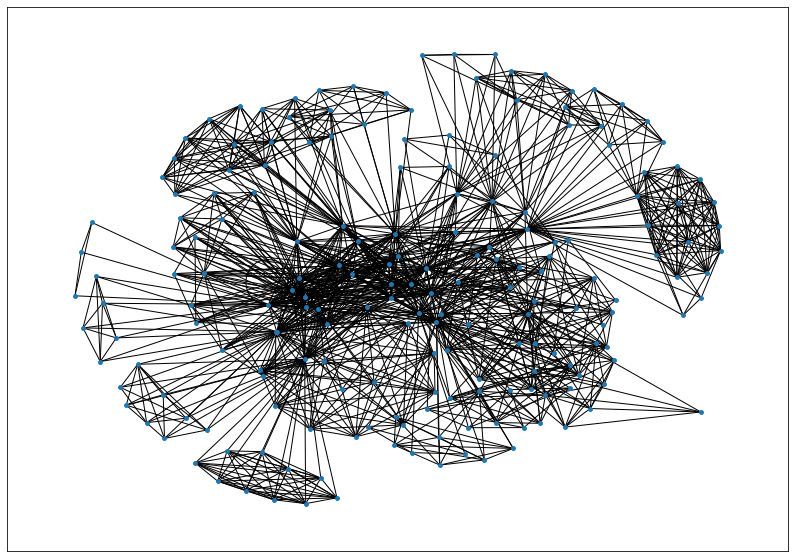

In [15]:
plt.figure(figsize = (14, 10)) 
nx.draw_networkx(G_movie, pos=nx.kamada_kawai_layout(G_movie), with_labels=False, node_size=15)

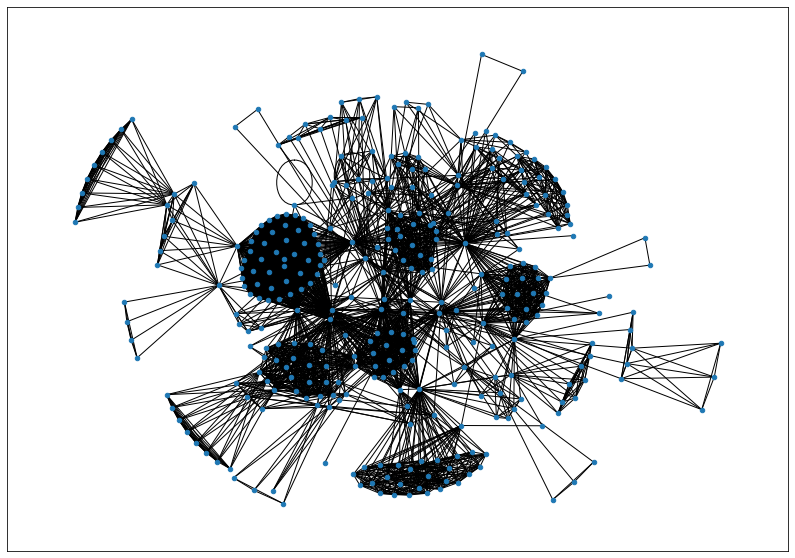

In [16]:
plt.figure(figsize = (14, 10)) 
nx.draw_networkx(G_comic, pos=nx.kamada_kawai_layout(G_comic), with_labels=False, node_size=20)

In [ ]:
def bipartite_graph(char_dict):
    """
    This functions returns a bipartite graphs where characters and movie/comics are both used as nodes, 
    and connected if a character has appeared in a movie/comic.
    """
    
    B = nx.Graph()

    for node, char in char_dict.items():
        # Skipping nodes that have no characters
        if not char:
            continue

        # Adding movie/comic nodes
        B.add_node(node, bipartite=0)

        char_names = [i['name'] for i in char]
        
        # Looping through charcters to add their nodes
        for i, char1 in enumerate(char_names):
            B.add_node(char1, bipartite=1)
            B.add_edge(char1, node)

    return B

In [74]:
B_movie = bipartite_graph(movie_char_dict)

In [75]:
B_movie.edges()

EdgeView([('Iron Man', 'Tony Stark/Iron Man'), ('Iron Man', 'Obadiah Stane/Iron Monger'), ('Iron Man', 'Pepper Potts'), ('Tony Stark/Iron Man', 'Iron Man 2'), ('Tony Stark/Iron Man', 'The Avengers'), ('Tony Stark/Iron Man', 'Iron Man 3'), ('Tony Stark/Iron Man', 'Avengers: Age of Ultron'), ('Tony Stark/Iron Man', 'Captain America: Civil War'), ('Tony Stark/Iron Man', 'Spider-Man: Homecoming'), ('Tony Stark/Iron Man', 'Avengers: Infinity War'), ('Tony Stark/Iron Man', 'Avengers: Endgame'), ('Pepper Potts', 'Iron Man 2'), ('Pepper Potts', 'Iron Man 3'), ('The Incredible Hulk', 'Bruce Banner/Hulk'), ('The Incredible Hulk', 'Betty Ross'), ('The Incredible Hulk', 'Emil Blonsky/Abomination'), ('The Incredible Hulk', 'Thaddeus Ross'), ('Bruce Banner/Hulk', 'The Avengers'), ('Bruce Banner/Hulk', 'Avengers: Age of Ultron'), ('Bruce Banner/Hulk', 'Thor: Ragnarok'), ('Bruce Banner/Hulk', 'Avengers: Infinity War'), ('Bruce Banner/Hulk', 'Avengers: Endgame'), ('Iron Man 2', 'James Rhodes/War Machin

In [44]:
B_comic = bipartite_graph(comic_char_dict)

In [45]:
B_comic.edges()

EdgeView([('Avengers: Battle the Earth-Wrecker', 'Captain America (Steve Rogers)'), ('Avengers: Battle the Earth-Wrecker', 'Goliath (Hank Pym)'), ('Avengers: Battle the Earth-Wrecker', 'Hawkeye (Clint Barton)'), ('Avengers: Battle the Earth-Wrecker', 'Wasp (Janet Van Dyne)'), ('Avengers: Battle the Earth-Wrecker', 'Iron Man (Tony Stark)'), ('Captain America (Steve Rogers)', 'Look & Find Marvel Heroes'), ('Captain America (Steve Rogers)', 'Meet Captain America'), ('Captain America (Steve Rogers)', 'The Mighty Avengers: These Are the Avengers'), ('Captain America (Steve Rogers)', 'Avengers: The Kree-Skrull War'), ('Hawkeye (Clint Barton)', 'Look & Find Marvel Heroes'), ('Wasp (Janet Van Dyne)', 'Breakout! (Book)'), ('Wasp (Janet Van Dyne)', 'The Man in the Ant Hill'), ('Iron Man (Tony Stark)', 'Look & Find Marvel Heroes'), ('Iron Man (Tony Stark)', 'Iron Man 2 (novel)'), ('Iron Man (Tony Stark)', 'Iron Man is Born'), ('Iron Man (Tony Stark)', 'Iron Man: Armored Adventures - Attack of the

In [76]:
edges_to_remove = [
    edge for edge in B_movie.edges()
    if B_movie.nodes[edge[0]]['bipartite'] == B_movie.nodes[edge[1]]['bipartite']
]

edges_to_remove
# B_movie.remove_edges_from(edges_to_remove)

[('Thor', 'Jane Foster'),
 ('Thor', 'Loki'),
 ('Thor', 'Odin'),
 ('Thor', 'Heimdall'),
 ('Thor', 'Sif'),
 ('Thor', 'Hogun')]

In [69]:
print("Graph is bipartite:", nx.is_bipartite(B_movie))

components = list(nx.connected_components(B_movie))
print(f"Number of connected components: {len(components)}")

isolated_nodes = list(nx.isolates(B_movie))
print("Isolated nodes:", isolated_nodes)

Graph is bipartite: True
Number of connected components: 5
Isolated nodes: ['Hogun']


In [52]:
print("Graph is bipartite:", nx.is_bipartite(B_comic))

components = list(nx.connected_components(B_comic))
print(f"Number of connected components: {len(components)}")

isolated_nodes = list(nx.isolates(B_comic))
print("Isolated nodes:", isolated_nodes)

Graph is bipartite: True
Number of connected components: 109
Isolated nodes: ['Amazing Spider-Man: Mayhem in Manhattan', 'Captain America: Holocaust for Hire', 'Fantastic Four: Doomsday', 'Iron Man: And Call My Killer...MODOK!', 'Amazing Spider-Man: Crime Campaign', 'Marvel Superheroes', 'Hulk/Spider-Man: Murdermoon', 'Amazing Spider-Man: City in Darkness', "Captain America: Rocket's Red Glare", 'Amazing Spider-Man: As the World Burns', 'Doctor Strange: Through Six Dimensions', 'Uncanny X-Men: An X-cellent Death', 'Daredevil: Guilt by Association', 'The Xavier Files', 'Iron Man: The Armor Trap', 'Incredible Hulk: What Savage Beast', 'X-Men: Sabretooth Unleashed', 'Fantastic Four: To Free Atlantis', "Daredevil: Predator's Smile", 'Spider-Man: Midnight Justice', 'X-Men: Mutant Empire Book One: Siege', 'You Are Spider-Man vs. The Sinister Six', 'Spider-Man and the Incredible Hulk: Rampage', 'X-Men: Mutant Empire Book Two: Sanctuary', 'Iron Man: Operation A.I.M.', 'X-Men: Smoke and Mirrors

In [ ]:
top_nodes = {n for n, d in B_movie.nodes(data=True) if d.get("bipartite") == 0}
bottom_nodes = {n for n, d in B_movie.nodes(data=True) if d.get("bipartite") == 1}

print(f"Top nodes (movies/comics): {len(top_nodes)}")
print(f"Bottom nodes (characters): {len(bottom_nodes)}")

Top nodes (movies/comics): 34
Bottom nodes (characters): 191


In [54]:
top_nodes = {n for n, d in B_comic.nodes(data=True) if d.get("bipartite") == 0}
bottom_nodes = {n for n, d in B_comic.nodes(data=True) if d.get("bipartite") == 1}

print(f"Top nodes (comics): {len(top_nodes)}")
print(f"Bottom nodes (characters): {len(bottom_nodes)}")


Top nodes (comics): 191
Bottom nodes (characters): 344


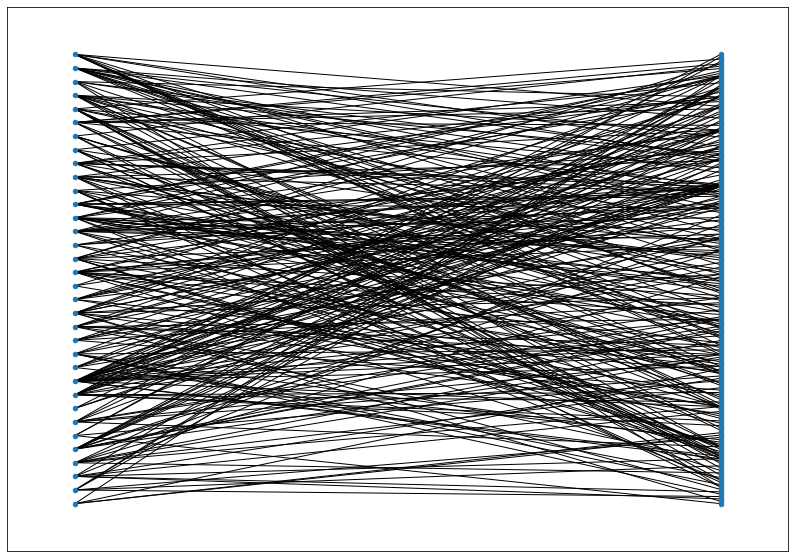

In [71]:
# Get all bipartite sets (and handling the disconnected graph manually)
top_nodes = {n for n, d in B_movie.nodes(data=True) if d.get("bipartite") == 0}

plt.figure(figsize=(14, 10))
nx.draw_networkx(B_movie, pos=nx.bipartite_layout(B_movie, nodes=top_nodes), with_labels=False, node_size=20)


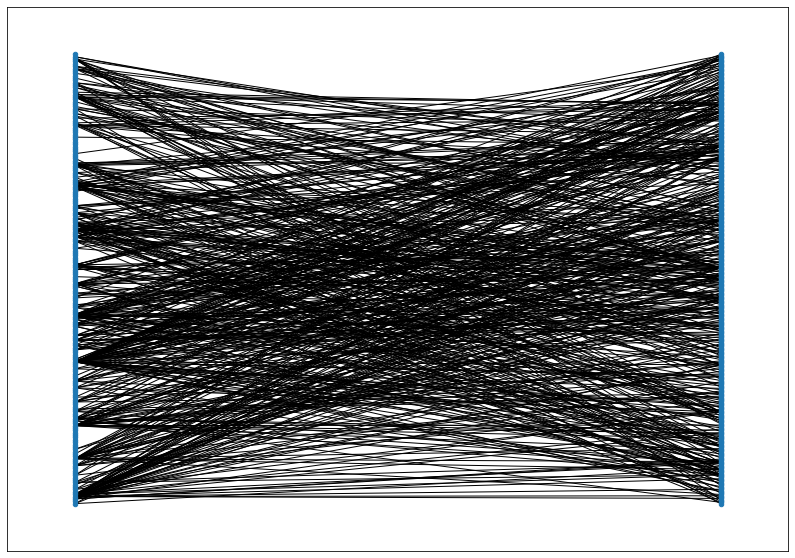

In [48]:
# Get all bipartite sets (and handling the disconnected graph manually)
top_nodes = {n for n, d in B_comic.nodes(data=True) if d.get("bipartite") == 0}

plt.figure(figsize=(14, 10))
nx.draw_networkx(B_comic, pos=nx.bipartite_layout(B_comic, nodes=top_nodes), with_labels=False, node_size=20)


In [21]:
deg_centrality_movie = dict(sorted(nx.degree_centrality(G_movie).items(), key=lambda item: item[1], reverse=True))
deg_centrality_comic = dict(sorted(nx.degree_centrality(G_comic).items(), key=lambda item: item[1], reverse=True))

print('Degree centrality of the movie network:', deg_centrality_movie)
print('Degree centrality of the comic network:', deg_centrality_comic)

Degree centrality of the movie network: {'Thor': 0.2631578947368421, 'Bruce Banner/Hulk': 0.22105263157894736, 'Natasha Romanoff/Black Widow': 0.22105263157894736, 'Steve Rogers/Captain America': 0.21578947368421053, 'Tony Stark/Iron Man': 0.21052631578947367, 'Wong': 0.21052631578947367, 'Okoye': 0.20526315789473684, 'Scott Lang/Ant-Man': 0.19999999999999998, 'Nebula': 0.19473684210526315, 'Shuri': 0.18947368421052632, 'Stephen Strange/Doctor Strange': 0.18421052631578946, 'Peter Quill/Star-Lord': 0.17894736842105263, 'Gamora': 0.17894736842105263, 'Drax the Destroyer': 0.17894736842105263, 'Rocket': 0.17894736842105263, 'Peter Parker/Spider-Man': 0.17368421052631577, "T'Challa/Black Panther": 0.16842105263157894, 'Groot': 0.1631578947368421, 'James Rhodes/War Machine': 0.15263157894736842, 'Mantis': 0.15263157894736842, 'Nick Fury': 0.14736842105263157, 'Bucky Barnes/Winter Soldier': 0.14210526315789473, 'Sam Wilson/Falcon': 0.14210526315789473, 'Wanda Maximoff': 0.14210526315789473,

In [22]:
def analyze_graph(G):
    """
    Perform network analysis on the graph.
    """
    N = G.number_of_nodes()
    L = G.number_of_edges()
    avg_degree = float(L) / N if N > 0 else 0
    
    degrees = [degree for _, degree in G.degree()]
    k_min = np.min(degrees)
    k_max = np.max(degrees)

    avg_clustering_coeff = nx.average_clustering(G)

    deg_centrality = sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)

    ############################

    print(f"Number of Nodes: {N}")
    print(f"Number of Edges: {L}")
    print(f"Average Degree: {avg_degree:.2f}")
    
    print(f"Minimum Degree: {k_min}")
    print(f"Maximum Degree: {k_max}")
    
    # if nx.is_connected(G):
    #     avg_short_path = nx.average_shortest_path_length(G)
    #     print(f"Average Shortest Path Length: {avg_short_path:.2f}")
    # else:
    #     print("Graph is not connected. Average Shortest Path Length cannot be computed.")

    print(f"Average Clustering Coefficient: {avg_clustering_coeff:.2f}")

    print("\nDegree Centrality (top 10):")
    for node, degree in deg_centrality[:10]:
        print(f"{node}: {degree:.2f}")

In [23]:
analyze_graph(G_movie)

Number of Nodes: 191
Number of Edges: 1205
Average Degree: 6.31
Minimum Degree: 2
Maximum Degree: 50
Average Clustering Coefficient: 0.91

Degree Centrality (top 10):
Thor: 0.26
Bruce Banner/Hulk: 0.22
Natasha Romanoff/Black Widow: 0.22
Steve Rogers/Captain America: 0.22
Tony Stark/Iron Man: 0.21
Wong: 0.21
Okoye: 0.21
Scott Lang/Ant-Man: 0.20
Nebula: 0.19
Shuri: 0.19


In [24]:
analyze_graph(G_comic)

Number of Nodes: 337
Number of Edges: 3275
Average Degree: 9.72
Minimum Degree: 1
Maximum Degree: 98
Average Clustering Coefficient: 0.90

Degree Centrality (top 10):
Galactus: 0.29
Doctor Doom: 0.27
Spider-Man (Peter Parker): 0.24
Ben Urich: 0.23
Avengers: 0.21
Bolivar Trask: 0.21
Iron Man: 0.19
Cyclops (Scott Summers): 0.16
Thor: 0.15
Thing: 0.14


The comic network, 337 nodesand 3275 edges, is a lot bigger than the movie network which has 191 nodes and 1205 edges. Comics have much more characters and storylines which is expected (and good for our goal of predicting the future)

We also have very high clustering coefficients of 0.9, which aligns the visualization of the networks - characters that appear together form comunities.

The degree centrality top 10 char definitly make sense, they are popular charcters that have often collaborate (at least in movies). The comic centrality shows other characters as well, such as cyclops, dr doom or similar, this is because the comics have a more narrative.


In [25]:
analyze_graph(B_movie)

Number of Nodes: 225
Number of Edges: 306
Average Degree: 1.36
Minimum Degree: 1
Maximum Degree: 23
Average Clustering Coefficient: 0.02

Degree Centrality (top 10):
Avengers: Infinity War: 0.10
Ant-Man and the Wasp: Quantumania: 0.06
Thor: 0.06
Eternals: 0.06
Deadpool & Wolverine: 0.06
Guardians of the Galaxy: 0.05
Avengers: Endgame: 0.05
Black Panther: Wakanda Forever: 0.05
Avengers: Age of Ultron: 0.05
Captain America: Civil War: 0.05


In [26]:
analyze_graph(B_comic)

Number of Nodes: 438
Number of Edges: 545
Average Degree: 1.24
Minimum Degree: 1
Maximum Degree: 48
Average Clustering Coefficient: 0.00

Degree Centrality (top 10):
X-Men: Watchers on the Walls: 0.11
Ultimate Super-Villains: 0.06
X-Men/Red Skull: The Chaos Engine: 0.05
Spider-Man: Drowned in Thunder: 0.05
Look & Find Marvel Heroes: 0.05
Iron Man: 0.04
Iron Man (novel): 0.04
Iron Man: Armored Adventures - High-Tech Hero: 0.03
Spider-Man: Carnage in New York: 0.03
Spider-Man (Peter Parker): 0.03


Compared to before, the bipartite networks have a larger number of nodes and clustering coeff of 0 (because there no connections between nodes of the same type).

Another difference is that the average degrees are low now, 1.36 and 1.24, which would again indicate sparse connections.

For the movies, Avengeres and their char stand out, while for the comics, the X-men series and iron-man spier-man (which are earlier movies - so maybe picked as the most famous comics?).